In this notebook we compute the group-level maps and plot them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from os.path import join as opj
from nilearn import glm, plotting, image
import os
from pathlib import Path
from glob import glob

/home/javi/Documentos/software/nilearn/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
/home/javi/Documentos/software/nilearn/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


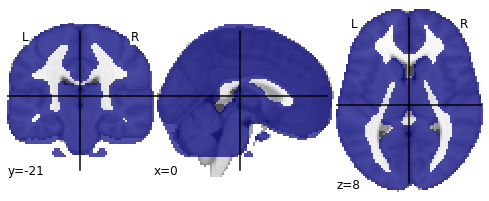

In [2]:
n_subjects = 176 
# We just look at the mean activation
design_matrix = pd.DataFrame({"intercept":[1]*n_subjects})
mask_img = "../data/reslicedER_grey25grey25.nii"
plotting.plot_roi(mask_img)

# LOOK NEGATIVE vs LOOK NEUTRAL

In [3]:
imgs_0001 = glob("../data/contrasts/*/con_0001.nii")
print("number of contrast images (one per subject) = ", len(imgs_0001))

number of contrast images (one per subject) =  176


In [7]:
Path("../results/group-level-maps/lookNeg_vs_lookNeut").mkdir(parents=True, exist_ok=True)
output_dir_0001 = Path("../results/group-level-maps/lookNeg_vs_lookNeut").absolute().as_posix()

In [5]:
# Define model
second_level_model_0001 = glm.second_level.SecondLevelModel(mask_img=mask_img)
# Fit model
second_level_model_0001.fit(imgs_0001, design_matrix=design_matrix)
# Compute contrast
second_level_model_res_0001 = second_level_model_0001.compute_contrast(output_type='all')
# Save files
for key, value in second_level_model_res_0001.items():
    value.to_filename(opj(output_dir_0001, key + ".nii.gz"))

/home/javi/Documentos/software/nilearn/nilearn/_utils/glm.py:335: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(X <= 0, 0, 1. / X)


In [11]:
# Threshold t-map without cluster extent
z_img_thr, _ = glm.threshold_stats_img(second_level_model_res_0001['z_score'], 
                                              mask_img=mask_img, 
                                              alpha=0.05, height_control="fdr")

t_map_0001_thr = image.math_img("img1*(abs(img2)>0)", 
                                img1=second_level_model_res_0001['stat'], 
                                img2=z_img_thr)
t_map_0001_thr.to_filename(opj(output_dir_0001, "stat_fdr05.nii.gz"))

In [12]:
# Threshold t-map with cluster extent
z_img_thr_clus, _ = glm.threshold_stats_img(second_level_model_res_0001['z_score'], 
                                              mask_img=mask_img, 
                                              alpha=0.05, height_control="fdr", cluster_threshold=50)

t_map_0001_thr_clus = image.math_img("img1*(abs(img2)>0)", 
                                img1=second_level_model_res_0001['stat'], 
                                img2=z_img_thr_clus)
t_map_0001_thr_clus.to_filename(opj(output_dir_0001, "stat_fdr05_k50.nii.gz"))

In [16]:
# Save these unthresholded and thresholded results to images folder
second_level_model_res_0001['stat'].to_filename("../images/LookNeg_LookNeut_maineff.nii.gz")
t_map_0001_thr.to_filename("../images/LookNeg_LookNeut_maineff_fdr05.nii.gz")
t_map_0001_thr_clus.to_filename("../images/LookNeg_LookNeut_maineff_fdr05_k50.nii.gz")

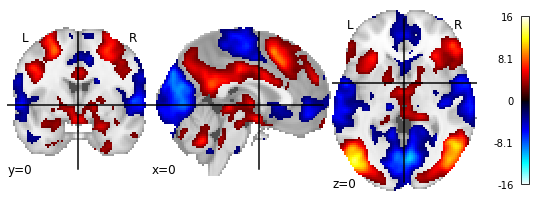

In [17]:
plotting.plot_stat_map(t_map_0001_thr, cut_coords=(0,0,0))

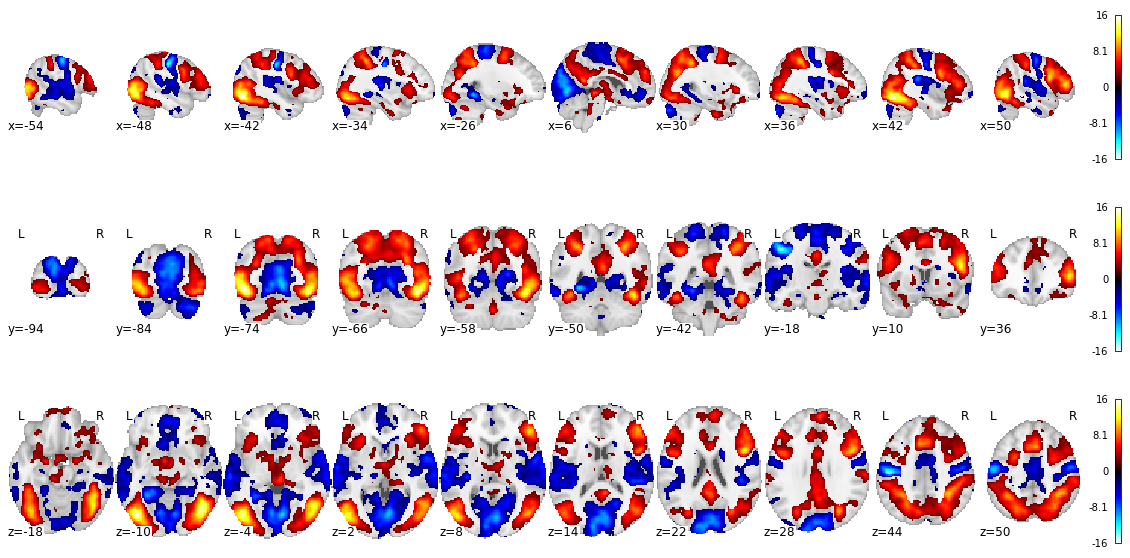

In [18]:
fig, ax = plt.subplots(figsize=(20,10), nrows=3)
plotting.plot_stat_map(t_map_0001_thr, 
                       display_mode='x', 
                       axes=ax[0], cut_coords=10, 
                       figure=fig)
plotting.plot_stat_map(t_map_0001_thr, 
                       display_mode='y', 
                       axes=ax[1], cut_coords=10, 
                       figure=fig)
plotting.plot_stat_map(t_map_0001_thr, 
                       display_mode='z', 
                       axes=ax[2], cut_coords=10, 
                       figure=fig)

# REGULATE NEGATIVE vs LOOK NEGATIVE

In [19]:
imgs_0002 = glob("../data/contrasts/*/con_0002.nii")
print("number of contrast images (one per subject) = ", len(imgs_0002))

number of contrast images (one per subject) =  176


In [20]:
Path("../results/group-level-maps/RegNeg_vs_lookNeg").mkdir(parents=True, exist_ok=True)
output_dir = Path("../results/group-level-maps/RegNeg_vs_lookNeg").absolute().as_posix()

In [21]:
# Define model
second_level_model_0002 = glm.second_level.SecondLevelModel(mask_img=mask_img)
# Fit model
second_level_model_0002.fit(imgs_0002, design_matrix=design_matrix)
# Compute contrast
second_level_model_res_0002 = second_level_model_0002.compute_contrast(output_type='all')

# Save files
for key, value in second_level_model_res_0002.items():
    value.to_filename(opj(output_dir, key + ".nii.gz"))

/home/javi/Documentos/software/nilearn/nilearn/_utils/glm.py:335: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(X <= 0, 0, 1. / X)


In [28]:
# Threshold t-map without cluster extent
z_img_thr, _ = glm.threshold_stats_img(second_level_model_res_0002['z_score'], 
                                              mask_img=mask_img, 
                                              alpha=0.05, height_control="fdr")

t_map_0002_thr = image.math_img("img1*(abs(img2)>0)", 
                                img1=second_level_model_res_0002['stat'], 
                                img2=z_img_thr)
t_map_0002_thr.to_filename(opj(output_dir, "stat_fdr05.nii.gz"))

In [29]:
# Threshold t-map with cluster extent
z_img_thr_clus, _ = glm.threshold_stats_img(second_level_model_res_0002['z_score'], 
                                              mask_img=mask_img, 
                                              alpha=0.05, height_control="fdr", cluster_threshold=50)

t_map_0002_thr_clus = image.math_img("img1*(abs(img2)>0)", 
                                img1=second_level_model_res_0002['stat'], 
                                img2=z_img_thr_clus)
t_map_0002_thr_clus.to_filename(opj(output_dir, "stat_fdr05_k50.nii.gz"))

In [24]:
# Save these unthresholded and thresholded results to images folder
second_level_model_res_0002['stat'].to_filename("../images/RegNeg_LookNeg_maineff.nii.gz")
t_map_0002_thr.to_filename("../images/RegNeg_LookNeg_maineff_fdr05.nii.gz")
t_map_0002_thr_clus.to_filename("../images/RegNeg_LookNeg_maineff_fdr05_k50.nii.gz")

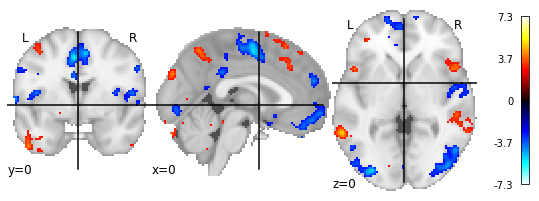

In [25]:
plotting.plot_stat_map(t_map_0002_thr, cut_coords=(0,0,0))

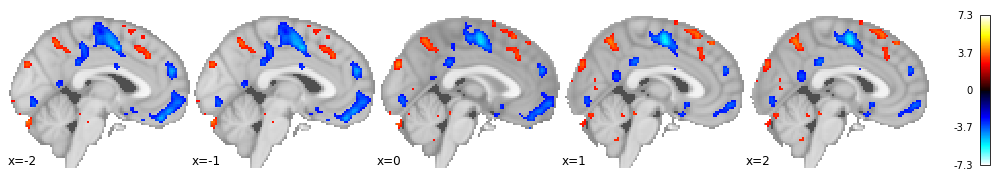

In [27]:
plotting.plot_stat_map(t_map_0002_thr, display_mode='x', cut_coords=[-2,-1,0,1,2])

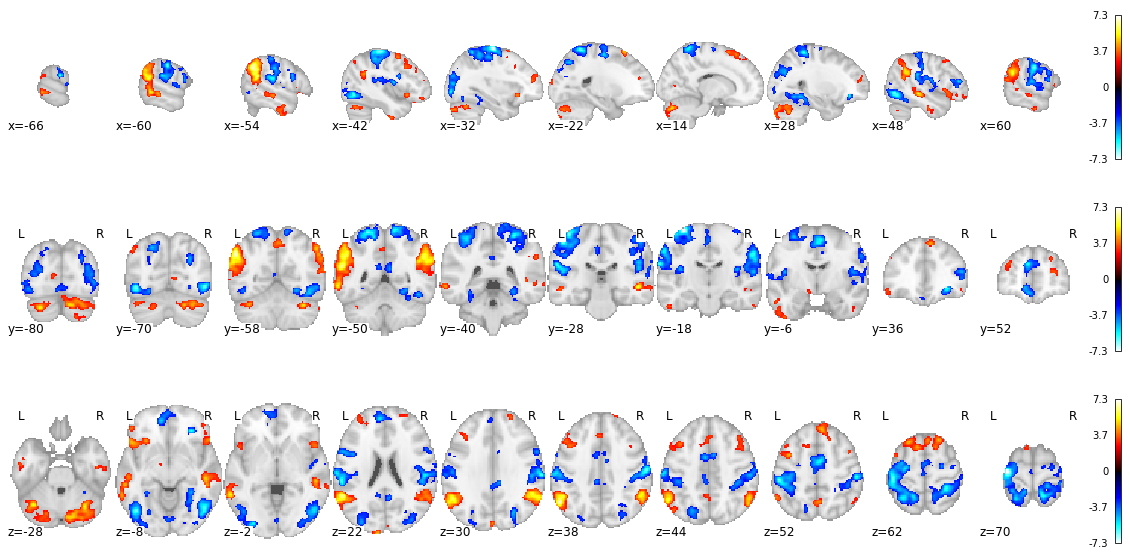

In [16]:
fig, ax = plt.subplots(figsize=(20,10), nrows=3)
plotting.plot_stat_map(t_map_0002_thr, 
                       display_mode='x', 
                       axes=ax[0], cut_coords=10, 
                       figure=fig)
plotting.plot_stat_map(t_map_0002_thr, 
                       display_mode='y', 
                       axes=ax[1], cut_coords=10, 
                       figure=fig)
plotting.plot_stat_map(t_map_0002_thr, 
                       display_mode='z', 
                       axes=ax[2], cut_coords=10, 
                       figure=fig)